<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/New_tweet_piechart_13feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
topics_list = pd.read_csv("/content/topic_info_filtered.csv")
topics_list

,Topic,Count,Name,Representation,Representative_Docs
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day..."
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...
...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...


In [2]:
!pip install cohere tiktoken

In [3]:
!pip install openai==0.28

In [4]:
import os
import openai

# Set up your OpenAI API key


openai.api_type = "azure"
openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
openai.api_version = "2023-05-15"

def generate_proper_topic_names(topic_names):
    proper_names = []
    for topic_name in topic_names:
        # Prompt to generate a proper topic name
        prompt = f"Generate a proper topic name for '{topic_name}'."

        # Call the OpenAI API to generate a proper topic name
        response = openai.Completion.create(
            engine="GenAI",
            prompt=prompt,
            max_tokens=50,
            n=1,
            stop=None,
            temperature=0.7,
        )

        # Extract the generated topic name from the response
        generated_name = response['choices'][0]['text'].strip()

        # Check if the generated name is empty or null
        if generated_name == "":
            # Use the original topic name as a fallback
            generated_name = topic_name

        proper_names.append(generated_name)

    return proper_names



# Generate proper topic names for the Name column
topic_names =topics_list['Name'].tolist()
topics_list['Proper_Topic_Names'] = generate_proper_topic_names(topic_names)

In [5]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day...","""Optimizing 0-Day Care for Hemophilia/Haemophi..."
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...,FDA Approval of HemGenix Gene Therapy for 1.VIII.
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...,HIV Contamination in Contaminated Blood
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...,Victoria's Chromosome Inbreeding in Cousin Mar...
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...,March 4th - Willebrand Bleeding Disorders Awar...
...,...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...,'94 Mary's Trip to Madison Lake in Nebraska
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...,"""The Impact of Corticosteroid Therapy on Adren..."
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...,'State-Specific Medicaid Renewal Process for C...
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...,Accountability for the Mankyblood Scandal of 1997


In [6]:
topics_list.to_csv("Openai_topic_names.csv", index = False)

In [6]:
!pip install sentence-transformers

In [7]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np

# Load the SentenceTransformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Embed the proper topic names
proper_topic_names = topics_list['Proper_Topic_Names'].tolist()
embeddings = model.encode(proper_topic_names)

# Convert embeddings to a 2D array
embeddings = np.array(embeddings)

# Add the embeddings as a new column in the dataframe
topics_list['embeddings'] = embeddings.tolist()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [8]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names,embeddings
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day...","""Optimizing 0-Day Care for Hemophilia/Haemophi...","[-0.1556970626115799, 0.25397759675979614, -0...."
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...,FDA Approval of HemGenix Gene Therapy for 1.VIII.,"[-0.26513034105300903, 0.2344813197851181, -0...."
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...,HIV Contamination in Contaminated Blood,"[-0.39501529932022095, 0.2583669126033783, -0...."
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...,Victoria's Chromosome Inbreeding in Cousin Mar...,"[0.15624186396598816, 0.5318931341171265, -0.2..."
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...,March 4th - Willebrand Bleeding Disorders Awar...,"[-0.4584193229675293, -0.1294073909521103, -0...."
...,...,...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...,'94 Mary's Trip to Madison Lake in Nebraska,"[0.4234521687030792, -0.2752680480480194, 0.16..."
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...,"""The Impact of Corticosteroid Therapy on Adren...","[-0.08694364875555038, -0.27306002378463745, 0..."
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...,'State-Specific Medicaid Renewal Process for C...,"[-0.02849540486931801, -0.22691284120082855, -..."
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...,Accountability for the Mankyblood Scandal of 1997,"[-0.47739851474761963, 0.1391095370054245, -0...."


In [9]:
# Extract the embeddings as a numpy array
embeddings = np.array(topics_list['embeddings'].tolist())

# Get the shape of the first embedding
embedding_shape = embeddings[0].shape

# Iterate through the embeddings and check if they all have the same shape
all_same_length = all(embedding.shape == embedding_shape for embedding in embeddings)

if all_same_length:
    print("All embeddings have the same length.")
else:
    print("Embeddings have different lengths.")

All embeddings have the same length.


In [10]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names,embeddings
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day...","""Optimizing 0-Day Care for Hemophilia/Haemophi...","[-0.1556970626115799, 0.25397759675979614, -0...."
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...,FDA Approval of HemGenix Gene Therapy for 1.VIII.,"[-0.26513034105300903, 0.2344813197851181, -0...."
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...,HIV Contamination in Contaminated Blood,"[-0.39501529932022095, 0.2583669126033783, -0...."
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...,Victoria's Chromosome Inbreeding in Cousin Mar...,"[0.15624186396598816, 0.5318931341171265, -0.2..."
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...,March 4th - Willebrand Bleeding Disorders Awar...,"[-0.4584193229675293, -0.1294073909521103, -0...."
...,...,...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...,'94 Mary's Trip to Madison Lake in Nebraska,"[0.4234521687030792, -0.2752680480480194, 0.16..."
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...,"""The Impact of Corticosteroid Therapy on Adren...","[-0.08694364875555038, -0.27306002378463745, 0..."
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...,'State-Specific Medicaid Renewal Process for C...,"[-0.02849540486931801, -0.22691284120082855, -..."
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...,Accountability for the Mankyblood Scandal of 1997,"[-0.47739851474761963, 0.1391095370054245, -0...."


In [11]:





# Extract the embeddings as a numpy array
embeddings = np.array(topics_list['embeddings'].tolist())

# Apply K-means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Update the cluster labels in the topics_list dataframe
topics_list['cluster_labels'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names,embeddings,cluster_labels
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day...","""Optimizing 0-Day Care for Hemophilia/Haemophi...","[-0.1556970626115799, 0.25397759675979614, -0....",4
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...,FDA Approval of HemGenix Gene Therapy for 1.VIII.,"[-0.26513034105300903, 0.2344813197851181, -0....",4
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...,HIV Contamination in Contaminated Blood,"[-0.39501529932022095, 0.2583669126033783, -0....",5
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...,Victoria's Chromosome Inbreeding in Cousin Mar...,"[0.15624186396598816, 0.5318931341171265, -0.2...",5
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...,March 4th - Willebrand Bleeding Disorders Awar...,"[-0.4584193229675293, -0.1294073909521103, -0....",5
...,...,...,...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...,'94 Mary's Trip to Madison Lake in Nebraska,"[0.4234521687030792, -0.2752680480480194, 0.16...",2
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...,"""The Impact of Corticosteroid Therapy on Adren...","[-0.08694364875555038, -0.27306002378463745, 0...",5
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...,'State-Specific Medicaid Renewal Process for C...,"[-0.02849540486931801, -0.22691284120082855, -...",3
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...,Accountability for the Mankyblood Scandal of 1997,"[-0.47739851474761963, 0.1391095370054245, -0....",0


In [13]:
# Get the cluster counts
cluster_counts = topics_list['cluster_labels'].value_counts().sort_index()
cluster_counts

0     8
1    12
2    24
3     7
4    12
5    26
6     5
7     2
8     1
9     2
Name: cluster_labels, dtype: int64

<ipython-input-14-b9027da6f392>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


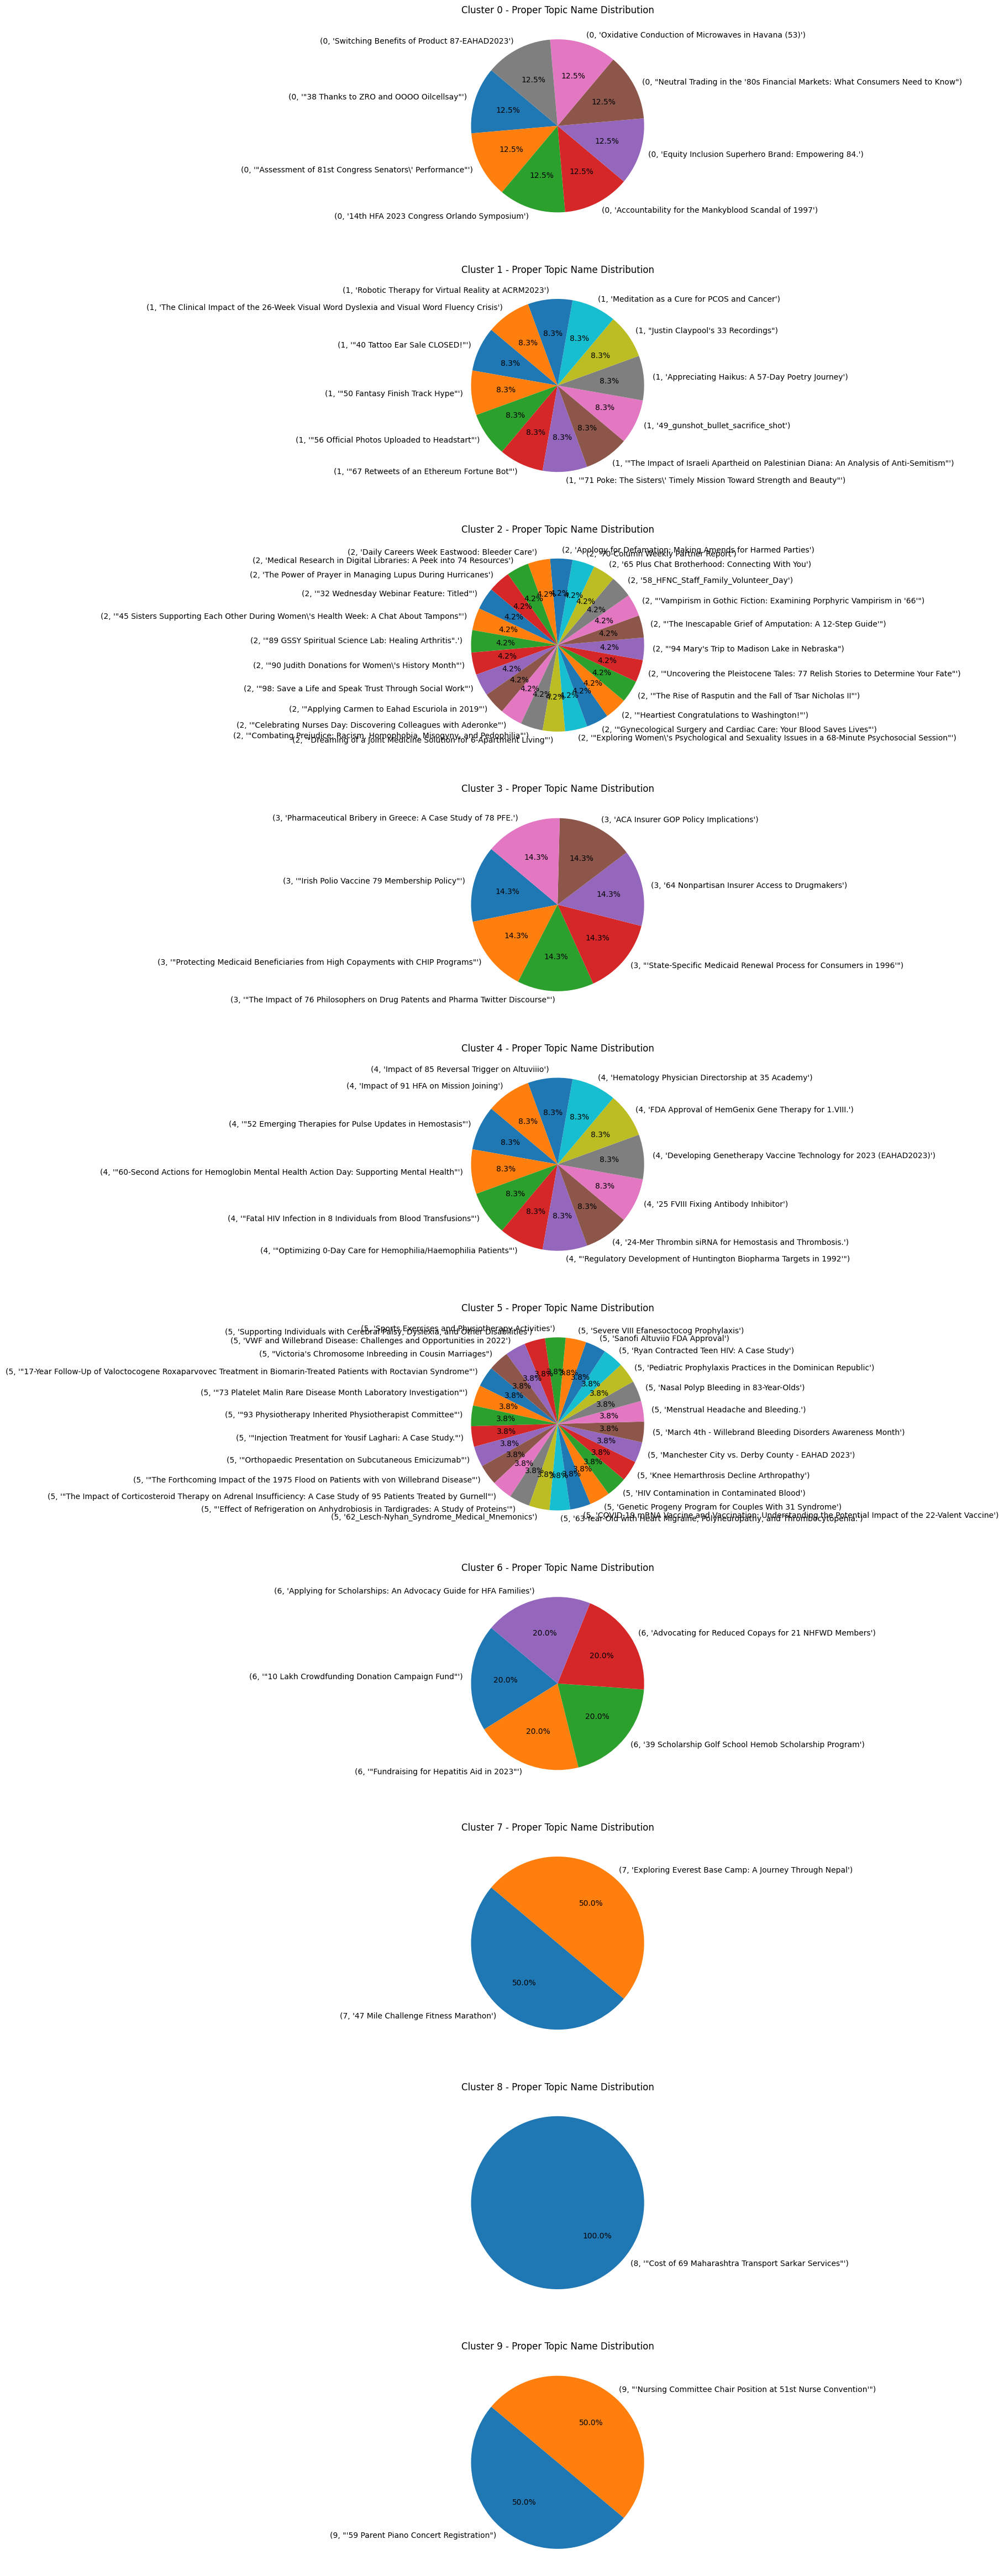

In [14]:
import matplotlib.pyplot as plt

# Group the dataframe by cluster labels and count the occurrences of each proper topic name
cluster_counts = topics_list.groupby('cluster_labels')['Proper_Topic_Names'].value_counts()

# Plot a pie chart for each cluster
num_clusters = len(cluster_counts.index.levels[0])
fig, axs = plt.subplots(num_clusters, figsize=(6, 6 * num_clusters))
for i, (cluster_label, counts) in enumerate(cluster_counts.groupby(level=0)):
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Cluster {cluster_label} - Proper Topic Name Distribution')
plt.tight_layout()
plt.show()

In [15]:
import plotly.express as px
# add cluster labels to dataframe
topics_list['cluster_labels'] = kmeans.labels_

# count number of topics in each cluster
cluster_counts =topics_list['cluster_labels'].value_counts().sort_index()

# create pie chart using Plotly
fig = px.pie(
    names=cluster_counts.index,
    values=cluster_counts.values,
    title="Cluster Distribution"
)

# show the pie chart
fig.show()

In [16]:
# Create a dictionary of clusters and the topics in each cluster
cluster_dict = {}
for i in range(10):
    cluster_dict[i] = list(topics_list[topics_list['cluster_labels']==i]['Proper_Topic_Names'])

# Print the topics in each cluster
for i in range(10):
    print("Cluster {}:".format(i))
    for topic in cluster_dict[i]:
        print("- {}".format(topic))

Cluster 0:
- 14th HFA 2023 Congress Orlando Symposium
- "38 Thanks to ZRO and OOOO Oilcellsay"
- Oxidative Conduction of Microwaves in Havana (53)
- Neutral Trading in the '80s Financial Markets: What Consumers Need to Know
- "Assessment of 81st Congress Senators' Performance"
- Equity Inclusion Superhero Brand: Empowering 84.
- Switching Benefits of Product 87-EAHAD2023
- Accountability for the Mankyblood Scandal of 1997
Cluster 1:
- Meditation as a Cure for PCOS and Cancer
- The Clinical Impact of the 26-Week Visual Word Dyslexia and Visual Word Fluency Crisis
- Justin Claypool's 33 Recordings
- "The Impact of Israeli Apartheid on Palestinian Diana: An Analysis of Anti-Semitism"
- "40 Tattoo Ear Sale CLOSED!"
- Robotic Therapy for Virtual Reality at ACRM2023
- 49_gunshot_bullet_sacrifice_shot
- "50 Fantasy Finish Track Hype"
- "56 Official Photos Uploaded to Headstart"
- Appreciating Haikus: A 57-Day Poetry Journey
- "67 Retweets of an Ethereum Fortune Bot"
- "71 Poke: The Sisters' T

In [20]:
import re
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity



# Extract the embeddings as a numpy array
embeddings = np.array(topics_list['embeddings'].tolist())



# Function to clean up the tweet
def clean_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove mentions and hashtags
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)
    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove extra whitespaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Function to generate a proper topic name using OpenAI
def generate_proper_topic_name(tweet):
    # Set up OpenAI API parameters
    openai.api_type = "azure"
    openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
    openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
    openai.api_version = "2023-05-15"

    # Prompt to generate a proper topic name
    prompt = f"Generate a proper topic name for '{tweet}'."

    # Call the OpenAI API to generate a proper topic name
    response = openai.Completion.create(
        engine="GenAI",
        prompt=prompt,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.6,
    )

    # Extract the generated topic name from the response
    generated_name = response['choices'][0]['text'].strip()

    # Check if the generated name is empty or null
    if generated_name == "":
        # Use the original tweet as a fallback
        generated_name = tweet

    return generated_name

# Function to generate embeddings for a given tweet
def generate_embeddings(tweet):
    # Add your sentence transformer code here
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    embedding = model.encode([tweet])
    return embedding

# Function to assign a new tweet to a cluster
def assign_tweet_to_cluster(tweet_embedding, threshold):
    # Calculate similarity with existing embeddings
    similarity_scores = cosine_similarity(tweet_embedding, embeddings)
    max_similarity = np.max(similarity_scores)

    if max_similarity >= threshold:
        cluster_assignment = np.argmax(similarity_scores)
    else:
        cluster_assignment = len(cluster_labels)  # Assign to 'Other' cluster

    return cluster_assignment

# Example new tweet
new_tweet = "i love to go to park."

# Clean up the new tweet
cleaned_tweet = clean_tweet(new_tweet)

# Generate embeddings for the cleaned tweet
tweet_embedding = generate_embeddings(cleaned_tweet)

# Set the similarity threshold
threshold = 0.8

# Assign the new tweet to a cluster
cluster_assignment = assign_tweet_to_cluster(tweet_embedding, threshold)

if cluster_assignment in cluster_labels:
    print("New tweet assigned to cluster:", cluster_assignment)
else:
    print("New tweet assigned to cluster: Other")

New tweet assigned to cluster: Other


In this updated code snippet, after assigning the new tweet to a cluster using the assign_tweet_to_cluster function, we check if the assigned cluster (cluster_assignment) is present in the existing cluster labels (cluster_labels). If it is present, we print the assigned cluster number. Otherwise, we print "Other" to indicate that the new tweet is not similar to any of the existing clusters.

In [17]:
import re
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity



# Extract the embeddings as a numpy array
embeddings = np.array(topics_list['embeddings'].tolist())



# Function to clean up the tweet
def clean_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove mentions and hashtags
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)
    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove extra whitespaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Function to generate a proper topic name using OpenAI
def generate_proper_topic_name(tweet):
    # Set up OpenAI API parameters
    openai.api_type = "azure"
    openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
    openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
    openai.api_version = "2023-05-15"

    # Prompt to generate a proper topic name
    prompt = f"Generate a proper topic name for '{tweet}'."

    # Call the OpenAI API to generate a proper topic name
    response = openai.Completion.create(
        engine="GenAI",
        prompt=prompt,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.6,
    )

    # Extract the generated topic name from the response
    generated_name = response['choices'][0]['text'].strip()

    # Check if the generated name is empty or null
    if generated_name == "":
        # Use the original tweet as a fallback
        generated_name = tweet

    return generated_name

# Function to generate embeddings for a given tweet
def generate_embeddings(tweet):
    # Add your sentence transformer code here
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    embedding = model.encode([tweet])
    return embedding



# Function to assign a new tweet to a cluster
def assign_tweet_to_cluster(tweet_embedding, threshold):
    # Calculate similarity with existing embeddings
    similarity_scores = cosine_similarity(tweet_embedding, embeddings)
    max_similarity = np.max(similarity_scores)

    if max_similarity >= threshold:
        cluster_assignment = np.argmax(similarity_scores)
    else:
        cluster_assignment = "Other"

    return cluster_assignment

# Example new tweet
new_tweet = "i love to netflix and chill"

# Clean up the new tweet
cleaned_tweet = clean_tweet(new_tweet)

# Generate embeddings for the cleaned tweet
tweet_embedding = generate_embeddings(cleaned_tweet)

# Set the similarity threshold
threshold = 0.8

# Assign the new tweet to a cluster
cluster_assignment = assign_tweet_to_cluster(tweet_embedding, threshold)

# Print the cluster assignment for the new tweet
print(f"The new tweet is assigned to: {cluster_assignment}")

# Get the updated cluster counts
cluster_counts = topics_list['cluster_labels'].value_counts().sort_index()

# Add 'Other' category if it doesn't exist
if 'Other' not in cluster_counts.index:
    cluster_counts['Other'] = 0

# Update the pie chart using Plotly
fig = px.pie(
    names=cluster_counts.index,
    values=cluster_counts.values,
    title="Cluster Distribution"
)

# Show the updated pie chart
fig.show()

The new tweet is assigned to: Other


In [18]:
import re
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity



# Extract the embeddings as a numpy array
embeddings = np.array(topics_list['embeddings'].tolist())



# Function to clean up the tweet
def clean_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove mentions and hashtags
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)
    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove extra whitespaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Function to generate a proper topic name using OpenAI
def generate_proper_topic_name(tweet):
    # Set up OpenAI API parameters
    openai.api_type = "azure"
    openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
    openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
    openai.api_version = "2023-05-15"

    # Prompt to generate a proper topic name
    prompt = f"Generate a proper topic name for '{tweet}'."

    # Call the OpenAI API to generate a proper topic name
    response = openai.Completion.create(
        engine="GenAI",
        prompt=prompt,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.6,
    )

    # Extract the generated topic name from the response
    generated_name = response['choices'][0]['text'].strip()

    # Check if the generated name is empty or null
    if generated_name == "":
        # Use the original tweet as a fallback
        generated_name = tweet

    return generated_name

# Function to generate embeddings for a given tweet
def generate_embeddings(tweet):
    # Add your sentence transformer code here
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    embedding = model.encode([tweet])
    return embedding



# Function to assign a new tweet to a cluster
def assign_tweet_to_cluster(tweet_embedding, threshold):
    # Calculate similarity with existing embeddings
    similarity_scores = cosine_similarity(tweet_embedding, embeddings)
    max_similarity = np.max(similarity_scores)

    if max_similarity >= threshold:
        cluster_assignment = np.argmax(similarity_scores)
    else:
        cluster_assignment = 10  # Assign to cluster label 10 ("Other")

    return cluster_assignment

# Example new tweet
new_tweet = "i love to netflix and chill"

# Clean up the new tweet
cleaned_tweet = clean_tweet(new_tweet)

# Generate embeddings for the cleaned tweet
tweet_embedding = generate_embeddings(cleaned_tweet)

# Set the similarity threshold
threshold = 0.8

# Assign the new tweet to a cluster
cluster_assignment = assign_tweet_to_cluster(tweet_embedding, threshold)

# Print the cluster assignment for the new tweet
print(f"The new tweet is assigned to: {cluster_assignment}")

# Add new tweet to the topics_list dataframe
new_row = pd.DataFrame([[cluster_assignment, tweet_embedding[0], cluster_assignment]], columns=['Proper_Topic_Names', 'embeddings', 'cluster_labels'])
topics_list = topics_list.append(new_row, ignore_index=True)

# Get the updated cluster counts
cluster_counts = topics_list['cluster_labels'].value_counts().sort_index()

# If cluster label 10 has count more than 1, reduce it to 1
if cluster_counts[10] > 1:
    cluster_counts[10] = 1

# Update the pie chart using Plotly
fig = px.pie(
    names=cluster_counts.index,
    values=cluster_counts.values,
    title="Cluster Distribution"
)

# Show the updated pie chart
fig.show()

The new tweet is assigned to: 99


<ipython-input-18-b25c48d2e6b0>:101: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

